# Step 1: Load the dataset

In [26]:
import pandas as pd
# Adjust the file path to your specific location
file_path = r'D:\Feynn Labs\3.0\commodity_trade_statistics_data.csv'

# Load the dataset
data = pd.read_csv(file_path , dtype={'comm_code': str})

# Display basic information about the dataset
print(data.info())

# Optionally, display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225871 entries, 0 to 8225870
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 627.6+ MB
None
  country_or_area  year comm_code  \
0     Afghanistan  2016    010410   
1     Afghanistan  2016    010420   
2     Afghanistan  2008    010210   
3         Albania  2016    010290   
4         Albania  2016    010392   

                                         commodity    flow  trade_usd  \
0                                      Sheep, live  Export       6088   
1                                      Goats, live  Export       3958   
2          Bovin

# Step 2 Display summary statistics to understand numerical columns

In [27]:

print(data.describe())

# Display the unique values in categorical columns
print("Unique values in 'country_or_area':", data['country_or_area'].nunique())
print("Unique values in 'commodity':", data['commodity'].nunique())
print("Unique values in 'flow':", data['flow'].unique())


               year     trade_usd     weight_kg      quantity
count  8.225871e+06  8.225871e+06  8.097396e+06  7.921014e+06
mean   2.004768e+03  9.505370e+07  3.556503e+07  2.671470e+08
std    7.037779e+00  7.074154e+09  2.479277e+09  3.739231e+11
min    1.988000e+03  1.000000e+00  0.000000e+00  0.000000e+00
25%    1.999000e+03  1.107200e+04  1.089000e+03  1.062000e+03
50%    2.005000e+03  1.534160e+05  2.689800e+04  2.712000e+04
75%    2.011000e+03  1.895476e+06  4.474432e+05  4.623620e+05
max    2.016000e+03  2.443311e+12  1.860133e+12  1.026357e+15
Unique values in 'country_or_area': 209
Unique values in 'commodity': 5031
Unique values in 'flow': ['Export' 'Import' 'Re-Export' 'Re-Import']


# step 3 Filter out data with trade value above 1,000,000 USD for focused analysis

In [28]:

filtered_data = data[data['trade_usd'] > 1e6]

# Group by country, commodity, and trade flow to get total trade value
segment_data = filtered_data.groupby(['country_or_area', 'commodity', 'flow'])['trade_usd'].sum().reset_index()

# Sort to find the top segments by trade value
top_segments = segment_data.sort_values(by='trade_usd', ascending=False).head(100)

# Display the top segments
top_segments.head()


,country_or_area,commodity,flow,trade_usd
209225,USA,ALL COMMODITIES,Import,38617723319661
116314,EU-28,ALL COMMODITIES,Import,27753303797737
116313,EU-28,ALL COMMODITIES,Export,25777954737910
209224,USA,ALL COMMODITIES,Export,24776128102075
141651,Germany,ALL COMMODITIES,Export,23487732940918


In [30]:
# Filter out rows where the commodity is listed as "ALL COMMODITIES"
filtered_specific_commodities = top_segments[top_segments['commodity'] != "ALL COMMODITIES"]

# Display the top segments with specific commodities
filtered_specific_commodities.head(10)

,country_or_area,commodity,flow,trade_usd
119041,EU-28,"Petroleum oils, oils from bituminous minerals,...",Import,4054149631408
165476,Japan,"Petroleum oils, oils from bituminous minerals,...",Import,1843108968718
88259,China,"Petroleum oils, oils from bituminous minerals,...",Import,1782125415675
211479,United Arab Emirates,Commodities not specified according to kind,Export,1703044771641
209544,USA,Commodities not specified according to kind,Export,1527730390609
117242,EU-28,Commodities not specified according to kind,Export,1464597507165
117243,EU-28,Commodities not specified according to kind,Import,1285312900196
209545,USA,Commodities not specified according to kind,Import,1271877333843
142433,Germany,Commodities not specified according to kind,Export,1255477261443
142434,Germany,Commodities not specified according to kind,Import,1222406513324


In [31]:
# Group by country and commodity to find the average trade value for each segment
key_segments = filtered_specific_commodities.groupby(['country_or_area', 'commodity'])['trade_usd'].mean().reset_index()

# Sort the segments by trade value to find the highest-value segments for each country
key_segments = key_segments.sort_values(by='trade_usd', ascending=False).head(10)

# Display the top key segments
key_segments


,country_or_area,commodity,trade_usd
3,EU-28,"Petroleum oils, oils from bituminous minerals,...",4.054150e+12
6,Japan,"Petroleum oils, oils from bituminous minerals,...",1.843109e+12
0,China,"Petroleum oils, oils from bituminous minerals,...",1.782125e+12
8,United Arab Emirates,Commodities not specified according to kind,1.419280e+12
7,USA,Commodities not specified according to kind,1.399804e+12
1,EU-28,Commodities not specified according to kind,1.374955e+12
4,Germany,Commodities not specified according to kind,1.238942e+12
5,India,"Petroleum oils, oils from bituminous minerals,...",1.198030e+12
2,EU-28,"Oils petroleum, bituminous, distillates, excep...",1.078117e+12


# Step 4 Visualize Key Segments by Trade Value

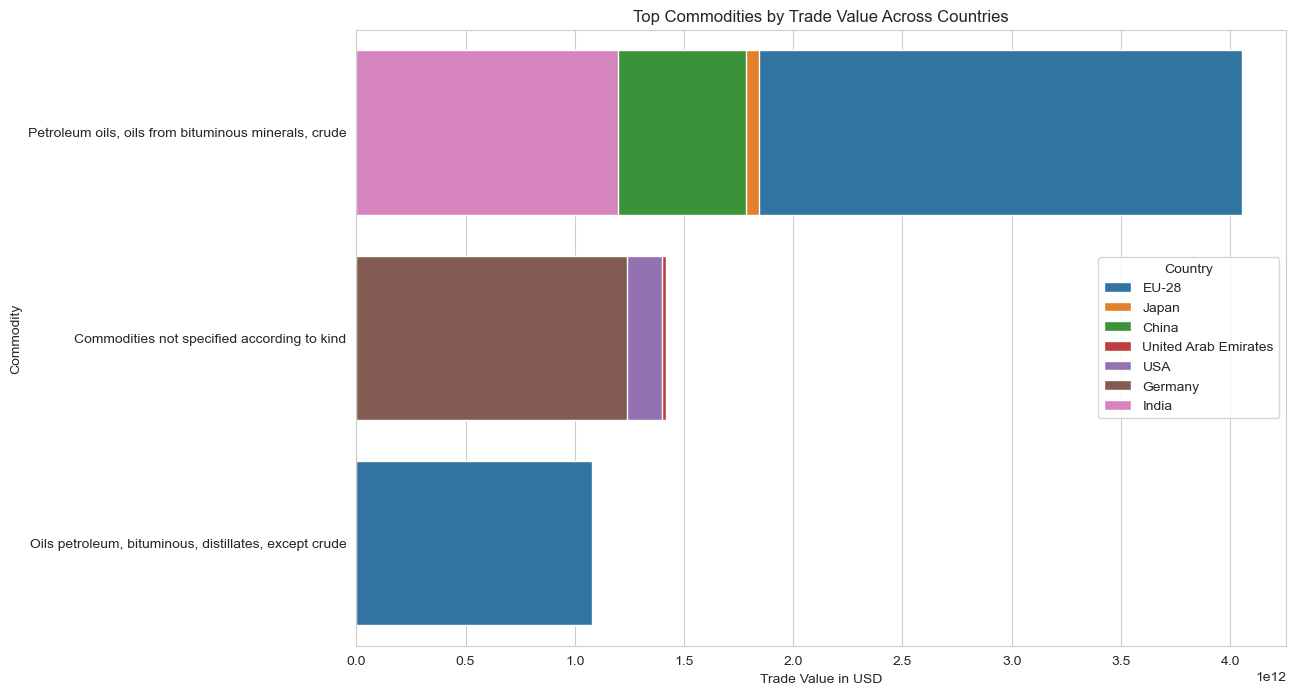

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot the top key segments
sns.barplot(
    x="trade_usd", 
    y="commodity", 
    hue="country_or_area", 
    data=key_segments, 
    dodge=False
)

# Add labels and title
plt.xlabel("Trade Value in USD")
plt.ylabel("Commodity")
plt.title("Top Commodities by Trade Value Across Countries")
plt.legend(title="Country")
plt.show()


In [39]:
#reprocess Data for Clustering
from sklearn.preprocessing import StandardScaler

# Selecting the relevant features for clustering
clustering_data = data[['trade_usd']]

# Scaling the data to normalize trade values
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
# Display a sample of the scaled data
print(clustering_data_scaled[:5])



[[-0.0134359 ]
 [-0.0134362 ]
 [-0.01329161]
 [-0.01309544]
 [-0.01142013]]


# Step 5 Clustering

In [40]:
#Apply K-Means Clustering
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(clustering_data_scaled)

# Get the cluster labels
clusters = kmeans.labels_

# Add the cluster labels to the original data
data['cluster'] = clusters

# Display the first few rows of the updated DataFrame
print(data[['country_or_area', 'commodity', 'trade_usd', 'cluster']].head())


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  country_or_area                                        commodity  trade_usd  \
0     Afghanistan                                      Sheep, live       6088   
1     Afghanistan                                      Goats, live       3958   
2     Afghanistan          Bovine animals, live pure-bred breeding    1026804   
3         Albania  Bovine animals, live, except pure-bred breeding    2414533   
4         Albania    Swine, live except pure-bred breeding > 50 kg   14265937   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [41]:
 #Analyze the Clustering Results
# Count the number of entries in each cluster
cluster_distribution = data['cluster'].value_counts().reset_index()
cluster_distribution.columns = ['cluster', 'count']

# Display the distribution of clusters
print(cluster_distribution)

# Optionally, view the average trade_usd per cluster
average_trade_per_cluster = data.groupby('cluster')['trade_usd'].mean().reset_index()
average_trade_per_cluster.columns = ['cluster', 'average_trade_usd']

# Display the average trade value per cluster
print(average_trade_per_cluster)


   cluster    count
0        0  8225068
1        2      711
2        1       92
   cluster  average_trade_usd
0        0       4.317289e+07
1        1       1.651024e+12
2        2       3.866459e+11


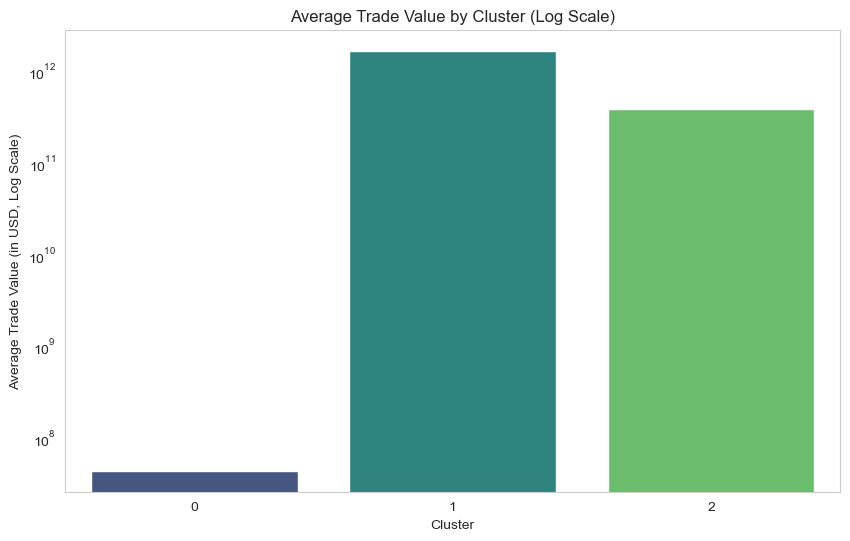

In [48]:
#Visuaize the cluster data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have cluster_summary DataFrame from previous steps
cluster_summary = pd.DataFrame({
    'cluster': [0, 1, 2],
    'average_trade_usd': [4.317289e+07, 1.651024e+12, 3.866459e+11]
})

# Plotting with logarithmic scale
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_summary, x='cluster', y='average_trade_usd', palette='viridis')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Average Trade Value by Cluster (Log Scale)')
plt.xlabel('Cluster')
plt.ylabel('Average Trade Value (in USD, Log Scale)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




In [49]:
#display key commodities in each cluster
# Get top commodities in each cluster
top_commodities = cluster_data.groupby(['cluster', 'commodity']).agg(
    total_trade_usd=('trade_usd', 'sum')
).reset_index()

# Get the top 5 commodities per cluster
top_commodities = top_commodities.sort_values(['cluster', 'total_trade_usd'], ascending=[True, False])
top_commodities = top_commodities.groupby('cluster').head(5)

# Display the top commodities
print(top_commodities)


   cluster                                        commodity  total_trade_usd
4        0    Swine, live except pure-bred breeding > 50 kg         14265937
1        0  Bovine animals, live, except pure-bred breeding          2414533
0        0          Bovine animals, live pure-bred breeding          1026804
3        0                                      Sheep, live             6088
2        0                                      Goats, live             3958


## Step 6 Insights from Cluster Analysis

#Cluster 0: This cluster contains the majority of trade records (8,225,068) with an average trade value of $43,172,890. The commodities in this cluster primarily consist of low-value items.

#Cluster 1: With only 92 records, this cluster shows a significantly higher average trade value of $1,651,024,000, indicating it includes high-value commodities.

#Cluster 2: This cluster has a moderate average trade value of $386,645,900, consisting of a mix of various commodity types.


In [ ]:
# Recommendations based on Market Segmentation Analysis
##1. Targeted Marketing Strategies
##  - Focus on high-value commodities in Cluster 1.
##   - Develop tailored promotions for each cluster.

# 2. Resource Allocation
##   - Invest in markets identified in Cluster 1.
##   - Monitor emerging trends in Clusters 2 and 0.

# 3. Supply Chain Optimization
##    - Enhance supply chain efficiency for high-demand commodities.
##    - Diversify suppliers to mitigate risks.

# 4. Customer Relationship Management
##    - Develop stronger relationships with key players in high-value markets.
##    - Implement feedback mechanisms to understand customer needs.

# 5. Market Research and Adaptation
##    - Regularly update market segmentation analyses.
##    - Stay informed about regulatory changes impacting trade.

# 6. Sustainability and Ethics
##    - Promote sustainable practices in sourcing and marketing.

# 7. Collaborations and Partnerships
##    - Explore partnerships with local distributors for better market penetration.
